<a href="https://colab.research.google.com/github/gkpatell/INDE-577-Final-Project/blob/main/Supervised%20Learning/Linear%20Regression/SL_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Import Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_california_housing

## Step 2: Loading the Dataset

In [ ]:
# Display the first few rows
housing_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Step 3: Data Preprocessing

In [ ]:
# Check for missing values
print("Missing Values in Each Column:")
print(housing_data.isnull().sum())

Missing Values in Each Column:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [ ]:
# Define features and target
X = housing_data.drop(columns=['MedHouseVal'])
y = housing_data['MedHouseVal']

In [ ]:
# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Step 4: Split Data into Training and Testing Sets

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Step 5: Model Pipeline

In [ ]:
#Build a pipeline
pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [ ]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

## Step 6: Predictions and Evaluation

In [ ]:
# Make predictions
y_pred = pipeline.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.56
R-squared: 0.58


## Step 7: Exploratory Data Analysis

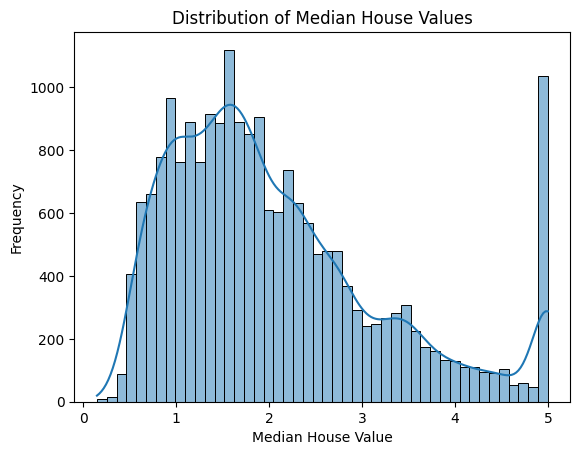

In [ ]:
# Distribution of the Target Variable
sns.histplot(housing_data['MedHouseVal'], kde=True)
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

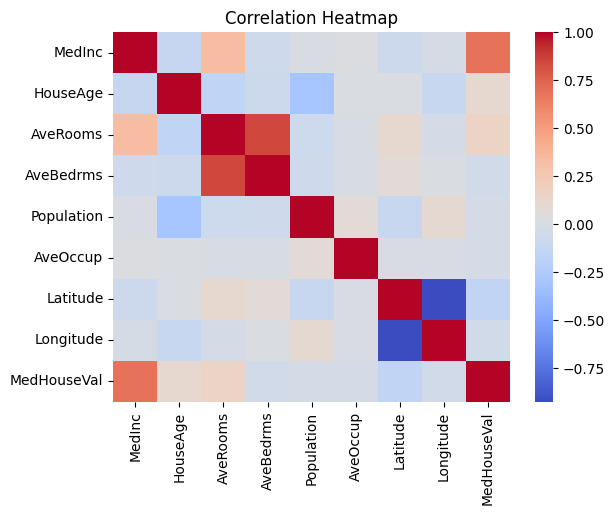

In [ ]:
# Correlation Heatmap
correlation = housing_data.corr()
sns.heatmap(correlation, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Step 8: Error Analysis

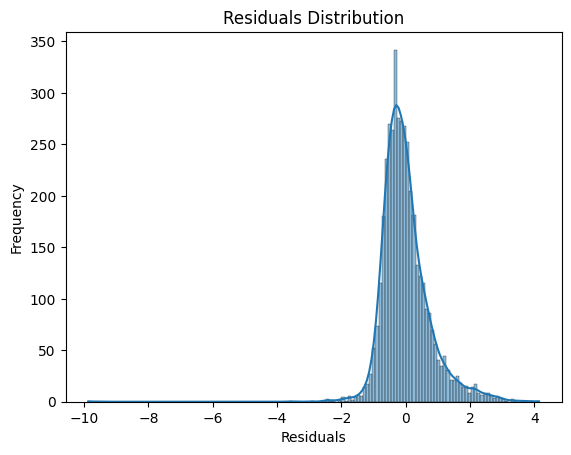

In [ ]:
# Residual Analysis
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

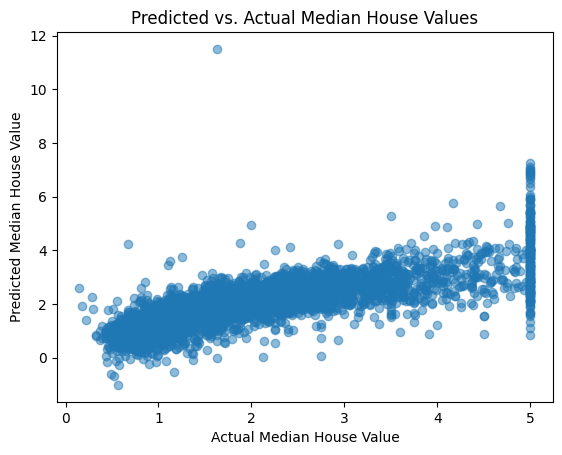

In [ ]:
# Plot Predicted vs. Actual
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Predicted vs. Actual Median House Values')
plt.show()

## Step 9: Saving the model

In [ ]:
import joblib
joblib.dump(pipeline, 'linear_regression_pipeline.pkl')

['linear_regression_pipeline.pkl']